Survival rate for passengers with family size 1: 0.5527950310559007
Survival rates for passengers who embarked from different ports
embarked_survival_rates: Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


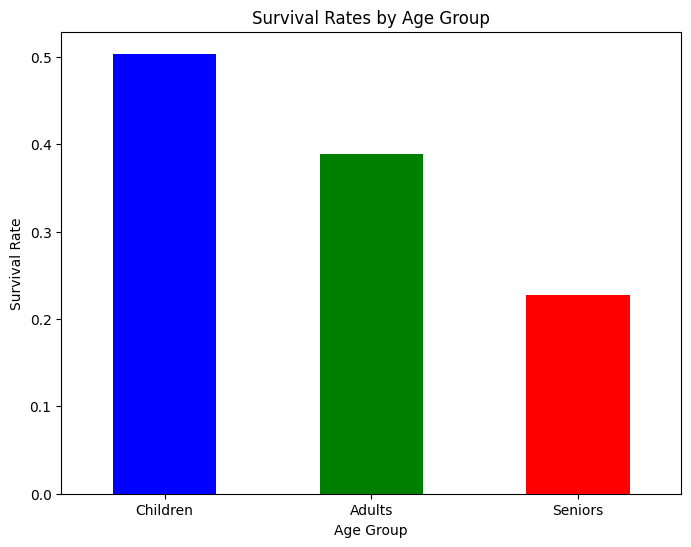

Average age for passengers who embarked at Southampton: 29.44539711191336
Survival rate for female passengers traveling alone: 0.7857142857142857


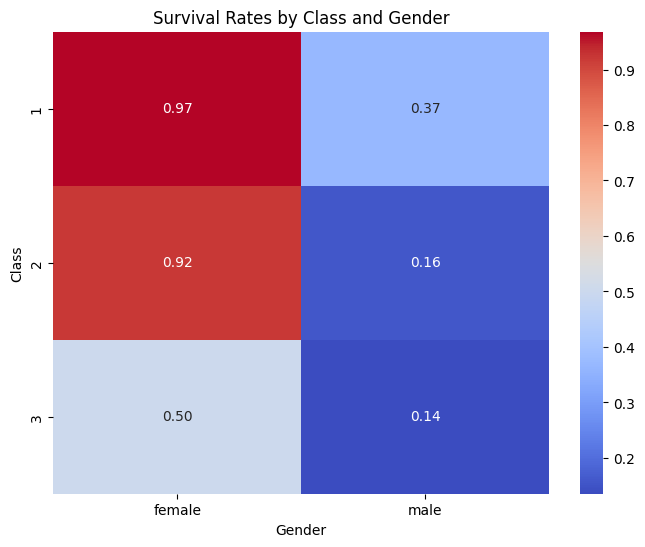

In [10]:
# Required libraries for analyzing this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing 'train data' from titanic data set
train_data = pd.read_csv('train.csv')

# 1. Analyze the survival rate for passengers with family size 1
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
family_size_1 = train_data[train_data['FamilySize'] == 1]
family_size_1_survival_rate = family_size_1['Survived'].mean()
print("Survival rate for passengers with family size 1:", family_size_1_survival_rate)

# 2. Compare survival rates for passengers who embarked from different ports
embarked_survival_rates = train_data.groupby('Embarked')['Survived'].mean()
print("Survival rates for passengers who embarked from different ports")
print("embarked_survival_rates:",embarked_survival_rates,)

# 3. Plot a bar chart for survival rates across age groups (children, adults, seniors)
# Define age groups
train_data['AgeGroup'] = pd.cut(
    train_data['Age'],
    bins=[0, 18, 60, 100],
    labels=['Children', 'Adults', 'Seniors']
)
age_group_survival = train_data.groupby('AgeGroup', observed=False)['Survived'].mean()


plt.figure(figsize=(8, 6))
age_group_survival_rates.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

# 4. Calculate the average age for passengers who embarked at Southampton
southampton_passengers = train_data[train_data['Embarked'] == 'S']
average_age_southampton = southampton_passengers['Age'].mean()
print("Average age for passengers who embarked at Southampton:", average_age_southampton)

# 5. Determine the survival rate for female passengers traveling alone
female_alone = train_data[(train_data['Sex'] == 'female') & (train_data['FamilySize'] == 0)]
female_alone_survival_rate = female_alone['Survived'].mean()
print("Survival rate for female passengers traveling alone:", female_alone_survival_rate)

# 6. Create a heatmap showing survival rates across combinations of class and gender
class_gender_survival = train_data.pivot_table(
    index='Pclass', columns='Sex', values='Survived', aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(class_gender_survival, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Survival Rates by Class and Gender')
plt.xlabel('Gender')
plt.ylabel('Class')
plt.show()